In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
from IPython.display import Image, display

        
datadir = 'data/'
imagesdir = 'images/'


# datadir = '/content/drive/My Drive/Courses/672/Notebooks/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))
        
        
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import rcParams
import calendar

### Exercise 1
Plot $y=(x+2)(x-1)(x-4)$ for $x$ going from $-3$ to $+5$ using a dashed red line. On the same figure, plot a blue circle for every point where $y$ equals zero. Set the size of the markers to 10. Label the axes as 'x-axis' and 'y-axis' and title the figure 'How cool is this?'. Here's what it should look like.


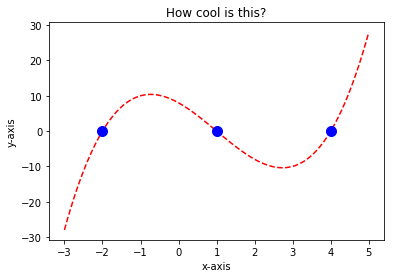

In [2]:
display_images(['M005_ex1.png'])

<function matplotlib.pyplot.show(close=None, block=None)>

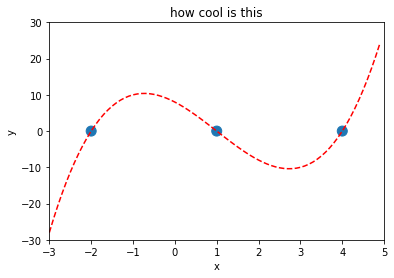

In [3]:
x=np.arange(-3,5,0.1)
y=(x+2)*(x-1)*(x-4)


data = np.array([
    [-2,0],
    [1,0],
    [4,0],
])
xs,ys= data.T

s=[100,100,100]


plt.scatter(xs,ys,s=s, marker='o')





plt.plot(x,y,color='red', linestyle='--')
plt.xlim(-3,5)
plt.ylim(-30,30)




plt.title('how cool is this')
plt.xlabel('x')
plt.ylabel('y')
plt.show



# Exercise 2

Write a more general function for plotting a polynomial and its roots, given a list of its roots.
plot_polynomial_and_roots(roots, xrange)
plots the polynomial and its roots from xrange[0] to xrange[1]. Here are two examples:
plot_polynomial_and_roots([-2, 1, 4], xrange=(-3, 5))
plot_polynomial_and_roots([-5, -2, 4, 12], xrange=(-7, 14))

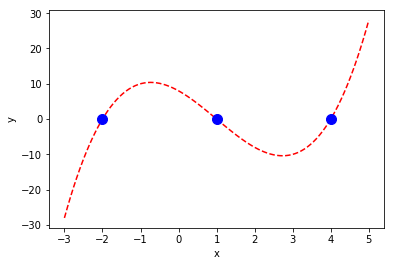

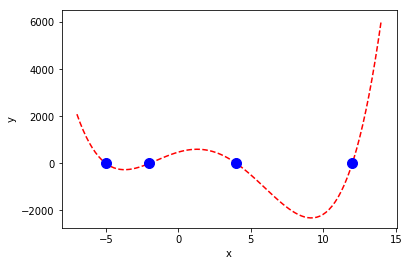

In [4]:
display_images(['M005_ex2A.png', 'M005_ex2B.png'])

In [5]:
def plot_polynomial_and_roots(roots, xrange):
    xrange = np.linspace(xrange[0], xrange[1])
    y_point=[]
    zeros=np.zeros(len(roots))
    
def find_yaxis_points(roots, xrange):
    for i in xrange:
        m=1
        for j in roots:
            m = m * (i-j)
        y_point.append(m)
        
        return y_point 

In [6]:
import sympy as sp
import matplotlib.pyplot as plt



x=sp.symbols('x')
a=(x+2)*(x-1)*(x-4)


p=np.poly1d([1,1,1])
rootsofPoly=p.r
print(rootsofPoly)


[-0.5+0.8660254j -0.5-0.8660254j]


In [7]:
def d(x,a,b,c):
    return x+a*x-b*x-4

# Exercise 3
Write code to produce the following graph. For the x tick marks, look into the methods provided by calendar as well as the rotation keyword argument of plt.xticks.

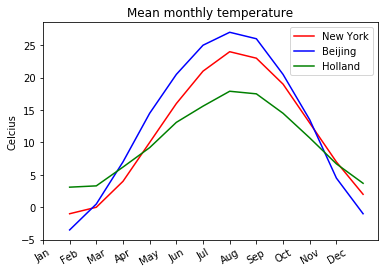

In [8]:
display_images(['M005_ex3.png'])

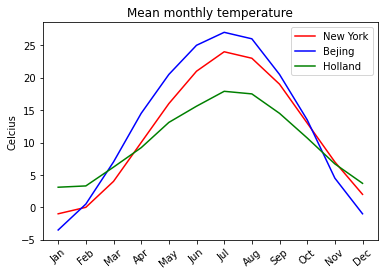

In [9]:
from matplotlib import dates as mpl_dates
import calendar
import datetime





nyc = np.loadtxt(datadir +'newyork_temperature.dat')
holland = np.loadtxt(datadir +'holland_temperature.dat')
beijing = np.loadtxt(datadir +'beijing_temperature.dat')

months=np.arange(1,13)

plt.plot(months,nyc,'r', label='New York')
plt.plot(months,beijing,'b', label='Bejing')
plt.plot(months,holland,'g', label='Holland')
plt.xticks(rotation=40)
plt.xticks(months, calendar.month_abbr[1:13])

plt.title('Mean monthly temperature')
plt.ylabel('Celcius')
plt.legend()
plt.show()

# Exercise 4
We can use plt.subplot to create a grid layout for the subplots that make up a figure:

    plt.subplot(nrows, ncols, index, **kwargs)

The first two arguments indicate the number of rows and columns. The index argument indicates the subplot (or axes) that is active. For example, plt.subplot(2, 1, 1) creates a 2 × 1 grid where the top subplot is active. Call plt.subplot(2, 1, 2) to activate the lower subplot.


Make a 2 × 1 grid where the top subplot shows Holland's mean air and sea temperature by month, and the bottom subplot shows the temperature differences by month. The two subplots share the same x axis and tick labels.

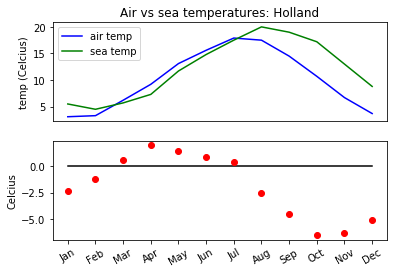

In [10]:
display_images(['M005_ex4.png'])

In [11]:
filename1 = 'holland_temperature.dat'
full_filename = datadir + filename1
dt = pd.read_csv(full_filename)



filename2 = 'holland_seawater.dat'
full_filename = datadir + filename2
ds = pd.read_csv(full_filename)

In [12]:
dt.columns

Index(['3.1\t3.3\t6.2\t9.2\t13.1\t15.6\t17.9\t17.5\t14.5\t10.7\t6.7\t3.7'], dtype='object')

In [13]:
ds.columns

Index(['5.5'], dtype='object')

In [14]:
import matplotlib.pyplot as plt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

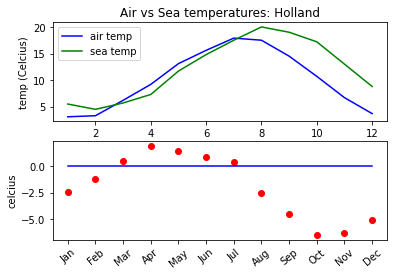

In [15]:
hollandTemp = np.loadtxt(datadir +'holland_temperature.dat')
hollandWater = np.loadtxt(datadir +'holland_seawater.dat')
temperatureDif = hollandTemp - hollandWater;
zeros = np.zeros(len(temperatureDif))

months=np.arange(1,13)


plt.subplot(2,1,1)
plt.title('Air vs Sea temperatures: Holland')
plt.ylabel('temp (Celcius)')
plt.plot(months,hollandTemp, 'b', label='air temp')
plt.plot(months,hollandWater, 'g', label='sea temp')
plt.legend()


plt.subplot(2,1,2)
plt.ylabel('Celcius')
plt.plot(months,temperatureDif, 'r', label='sea temp', linestyle='None', marker='o')
plt.plot(months, zeros, 'g', label='sea temp', linestyle='-', color='b')
plt.xticks(months, calendar.month_abbr[1:13])
plt.ylabel('celcius')
plt.xticks(rotation=40)

### Exercise 5
The following ```graph_function``` gets called with a function that maps from the domain $[x1,x2]$ to the reals and plots it.

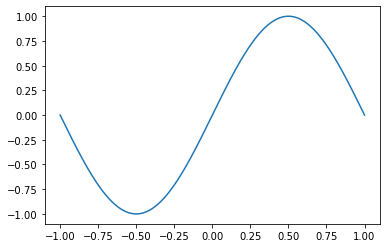

In [16]:
def graph_function(f, x1=-1, x2=1, precision=300):
    xs = np.linspace(x1, x2, precision)
    ys = np.vectorize(f)(xs) 
    plt.plot(xs, ys)

# An example
def f(x):
    return math.sin(np.pi *x)

graph_function(f)

For each of the following images, write a function and call ```graph_function``` on your function to produce the image. I used three calls to ```graph_function``` to produce the last image.

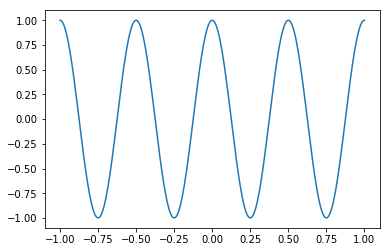

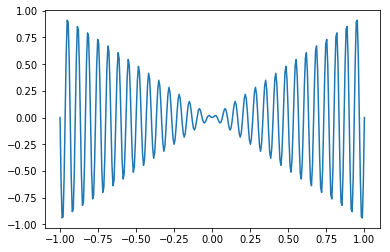

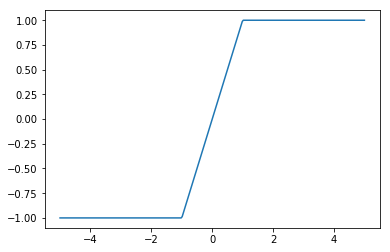

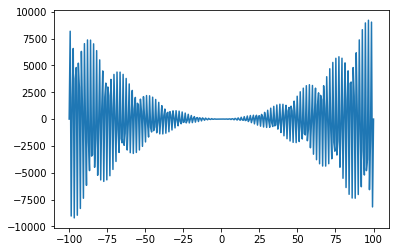

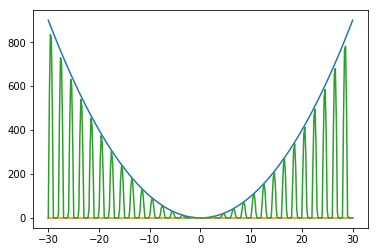

In [17]:
files = ['M005_ass1_f' + str(i) + '.png' for i in range(1,6)]
display_images(files)

In [18]:
import math
import matplotlib.pyplot as plt

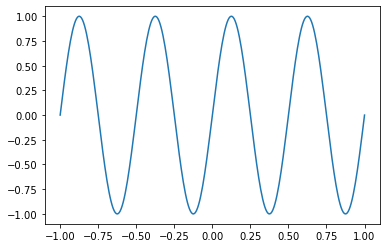

In [19]:
def graph_function(f, x1=-1, x2=1, precision=300):
    xs = np.linspace(x1, x2, precision)
    ys = np.vectorize(f)(xs) 
    plt.plot(xs, ys)

def f(x):
    return math.sin(np.pi *x*2**2)

graph_function(f)

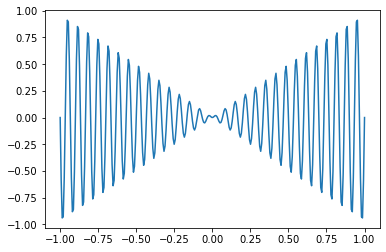

In [20]:
def f1(x):
    return math.sin(np.pi*x*30)*x
graph_function(f1)
plt.show()

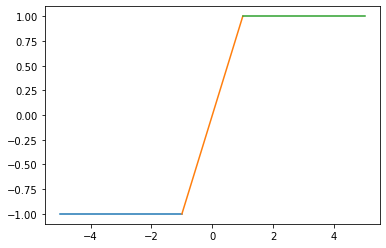

In [38]:
def f2(x):
    if x < -1:
        return -1
    elif x <= 1:
        return x
    else:
        return 1
graph_function(f2, x1=-5, x2=-1)
graph_function(f2, x1=1, x2=-1)
graph_function(f2, x1=1,x2=5)
plt.show()

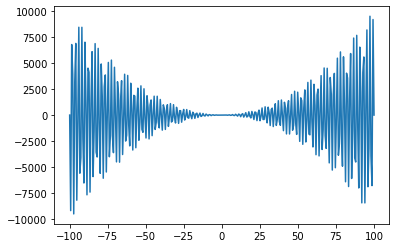

In [43]:
def f3(x):
    return np.sin(np.pi*x*20)*x**2
graph_function(f3, x1=-100, x2=100)

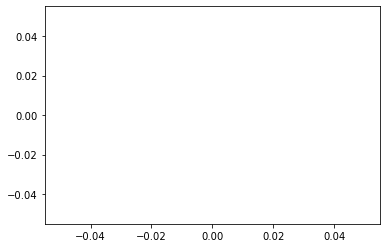

In [25]:
def f4

### Exercise 6
Write a function ```plot_many_points(n, x0, y0, r)``` that generates *n* random points in the square $[0,0]\times [100,100]$. Your function should plot all *n* points such that those that are no more than distance *r* from the point *(x0, y0)* are colored red and the remaining points are green. Also plot the point *(x0,y0)* in black. For example:

```plot_many_points(800, 60, 40, 20)```

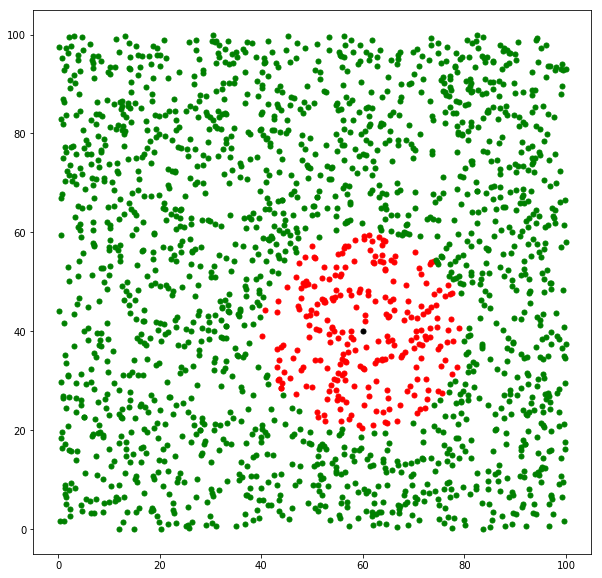

In [26]:
display_images(['plotManyPointsB.png'])

In [27]:
import random

In [28]:
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(close=None, block=None)>

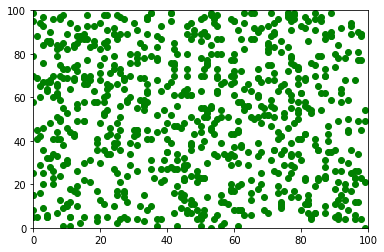

In [31]:


x = np.random.randint(0,100,800)
y = np.random.randint(0, 100,800)
##print(x)
##print(y)

plt.scatter(x,y, color='g')
plt.xlim(0.0,100)
plt.ylim(0.0,100)

distanceX=[]
distanceY=[]




plt.show






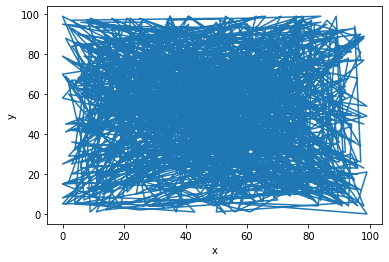

AttributeError: module 'numpy' has no attribute 'radomn'

In [56]:
import math
from scipy.spatial import distance
def plot_many_points(n,x0,y0,r):
    x = np.random.rand(n)*100
    y = np.radomn.rand(n)*100
    plt.scatter(x,y,color='green')
    distanceX=[]
    distanceY=[]
    

    
    
plt.plot(x,y)    
plt.xlabel('x')
plt.ylabel('y')

plt.show()
plot_many_points(800,60,40,20)
